## Scientific Computing 2019: Homework Assignment 2 
Due Thursday October 17, 2019, noon (12:00)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

### Solution

1. We know that for an arbitrary matrix $A$ , then $\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}$. So let's calculate eigenvalues for $A^*A$: $\left(\begin{matrix}1 & 0\\ q & 1\end{matrix}\right) \left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)=\left(\begin{matrix}1 & q\\ q & q^2+1\end{matrix}\right)\Rightarrow P(\lambda)=(1-\lambda)(q^2+1-\lambda)-q^2=\lambda^2+\lambda(-q^2-2)+1\Rightarrow\lambda_{1,2}=\cfrac{q^2+2\pm q\sqrt{q^2+4}}{2}\Rightarrow\kappa(A)=\sqrt{\cfrac{q^2+2+q\sqrt{q^2+4}}{q^2+2-q\sqrt{q^2+4}}}=\sqrt{\cfrac{(q^2+2+q\sqrt{q^2+4})^2}{(q^2+2-q\sqrt{q^2+4})(q^2+2+q\sqrt{q^2+4})}}=\cfrac{(q^2+2+q\sqrt{q^2+4})}{\sqrt{q^4+4q^2+4-q^4-4q^2}}=\frac{1}{2}(q^2+2+q\sqrt{q^2+4})$
<br>
<br>
2. Let $b$ be $\left(\begin{matrix} q^2 \\ q \end{matrix}\right)$, $\Delta b$ be $\left(\begin{matrix} 1 \\ 0 \end{matrix}\right):\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)\left(\begin{matrix} 0 \\ q \end{matrix}\right) = \left(\begin{matrix} q^2 \\ q \end{matrix} \right)\rightarrow \left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)\left(\begin{matrix} 1 \\ q \end{matrix}\right) = \left(\begin{matrix} 1+q^2 \\ q \end{matrix} \right)$ <br> 
$ \cfrac{\| \Delta b \|}{{\|  b \|}} = \cfrac{\sqrt{1+0}}{q\sqrt{q^2+1}} $. Since $ \cfrac{\| \Delta x \|}{{\|  x \|}} =\cfrac{\sqrt{1+0}}{\sqrt{q^2+0}}= \cfrac{1}{q} \Rightarrow \cfrac{1}{q}\ge 10^6\cfrac{1}{q\cdot \sqrt{q^2+1}}$, we can take $ \sqrt{1+q^2}>10^{6} \Rightarrow q_0=10^{6}  \rightarrow \cfrac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\cfrac{\|\Delta\mathbf b\|}{\|\mathbf b\|}$<br>
So all nessesary components are given and task condition satisfied.

### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

### Solution

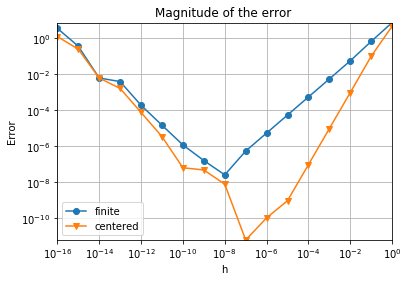

Minimum error for finite difference: 2.554135347665465e-08 ; h =  1e-08
Minimum error for centered difference: 6.2239102760486276e-12 ; h =  1e-07


In [2]:
# Programm to compute aproximate and analytic derivatives and error between them for tan(x)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Define function

def f(x):
    return np.tan(x) # Test function f(x) = tan(x)

def df(x): # Derivative of the test function
    return (1.0/np.cos(x))*(1.0/np.cos(x))

def finite_difference(f, x, h):
    return (f(x+h)-f(x))/h # Finite-difference approximation

def centered_difference(f, x, h):
    return (f(x+h)-f(x-h))/2./h # Centered-difference approximation

def error(f, df_test, x, h): # Error in derivation
    return np.abs(df_test(f, float(x), h) - df(float(x)))

x = 1 
error_array_finite = []
error_array_centered = []
h = [10 ** (-k) for k in range(0,17)] # Step

for k in h:
    error_array_finite.append(error(f,finite_difference, x, k))
    error_array_centered.append(error(f,centered_difference, x, k))

plt.title('Magnitude of the error ')
plt.xlabel('h')
plt.ylabel('Error')
plt.yscale('log')
plt.xscale('log')
plt.xlim(np.min(h), np.max(h))
plt.ylim(min(min(error_array_finite),min(error_array_centered)), max(max(error_array_finite),max(error_array_centered)))
plt.plot(h, error_array_finite,marker = 'o', label ='finite')
plt.plot(h, error_array_centered,marker = 'v', label = 'centered')
plt.grid()
plt.legend(loc='best')
plt.show()
print('Minimum error for finite difference:', min(error_array_finite), '; h = ',h[error_array_finite.index(min(error_array_finite))])
print('Minimum error for centered difference:', min(error_array_centered), '; h = ',h[error_array_centered.index(min(error_array_centered))])

As we can see centered difference gives better (smaller) minimum error than finite difference, the minimum is also shifted to the right for centered (for the same h, the error is smaller than finite difference one). What is the reason?
There are 2 types of errors: first, so-called "machine error", corresponds for high error to the left of the minimum (with decreasing of the step h) and occurs because of dividing by a very small value (~$10^{-10} $ is already significant).
Second type caused by error of the difference formula itself (the larger x, the greater the calculation error). And here also lies the difference between formulas that explains different order of errors. Let's consider Taylor expansion of given formulas:<br>
$$f'(x)-\cfrac{f(x+h)-f(x)}{h}=f'(x)-\cfrac{f(x)+f'(x)h+O(h)-f(x)}{h} \text{ - order of approximation is } O(h)$$
$$f'(x)-\cfrac{f(x+h)-f(x-h)}{2h}=f'(x)-\cfrac{f(x)+f'(x)h+f''(x)\frac{h^2}{2}-f(x)+f'(x)h-f''(x)\frac{h^2}{2}+O(h^2)}{2h} \text{ - order of approximation is } O(h^2)$$<br>
So the order of approximation for centered difference is higher, that's why the error is lower than the first case one.

### Solution

### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

As it was on seminar we will use the training data to estimate the regression coefficients:

$$\widetilde{\mathbf c}= (X^t_{\mathrm train}X_{\mathrm train}+\mu)^{-1}X_{\mathrm train}^t\mathbf y_{\mathrm train}$$

Then, we can use the estimated coefficients to make prediction on the test data:

$$\mathbf y_{\mathrm pred}=X_{\mathrm test}\widetilde{\mathbf c}$$

Here we will use compare numpy solution with Ridge(), Lasso() and LinearRegression():

c:\users\dg\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2533.0203551470727, tolerance: 1.047004508457
  positive)


LinearRegression Error = 0.8534342076141624
Ridge Error = 0.854682458788227
Lasso Error = 0.8543741526508851
My algorithm Error = 0.85440691724299
Estimated parameter for regression = 1e-07

Error for M = 1e-4 0.8544083657490815
Difference between M = 1e-4 and M = 1e-07 : 3.6566910120928717e-05


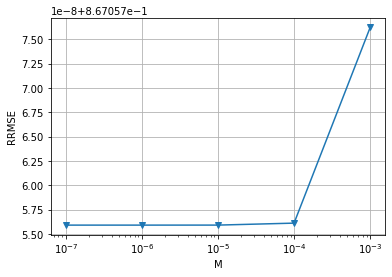

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
%matplotlib inline

def report_rrmse(y_test, y_pred): # Error 
    return np.linalg.norm(y_pred-y_test)/np.linalg.norm(y_test-np.mean(y_test))

def My_reg(X_train, y_train, X_test):
    M = [10**i for i in range(-7, -2)]
    Error = []
    for M_i in M: # Cycle for searching of the best parameter
        c = np.linalg.inv((X_train.T.dot(X_train) + M_i*np.eye(X_train.shape[1]))).dot(X_train.T.dot(y_train))
        y_pred_train = X_train.dot(c)
        Error.append(report_rrmse(y_train, y_pred_train))       
    M_best_case = M[Error.index(min(Error))] # We found parameter corresponding the lowest error and now can calculate best C
    c_best = np.linalg.inv((X_train.T.dot(X_train) + M_best_case*np.eye(X_train.shape[1]))).dot(X_train.T.dot(y_train))
    return X_test.dot(c_best), M_best_case, Error, M

data = pd.read_csv('CASP.csv')
X = np.array(data.drop(['RMSD'], axis=1))
y = np.array(data['RMSD'])
#data = pd.read_csv('slice_localization_data.csv')
#data = data.set_index(['patientId'])
#y = np.array(data['reference'])
#X = np.array(data.drop(['reference'], axis=1))
# print(X.shape,'X general')
# print(y.shape,'y general')

ind = np.random.permutation(len(y))

X_train = X[ind[:300]]
y_train = y[ind[:300]]
X_test = X[ind[300:]]
y_test = y[ind[300:]]

# print(X_train.shape,'X_train ')
# print(y_train.shape,'y train')
# print(X_test.shape,'X_test')
# print(y_test.shape,'y test')

clf_Ridge = Ridge().fit(X_train, y_train) # Trying different methods
clf_Lr = LinearRegression().fit(X_train, y_train)
clf_Lasso = Lasso().fit(X_train, y_train)

y_pred_Ridge = clf_Ridge.predict(X_test)
y_pred_Lr = clf_Lr.predict(X_test)
y_pred_Lasso = clf_Lasso.predict(X_test)
y_pred_test, M_best_case, Error, M = My_reg(X_train, y_train, X_test) # Proposed method

print("LinearRegression Error =", report_rrmse(y_test, y_pred_Lr))
print("Ridge Error =", report_rrmse(y_test, y_pred_Ridge))
print("Lasso Error =", report_rrmse(y_test, y_pred_Lasso))
print("My algorithm Error =", report_rrmse(y_test, y_pred_test))
print('Estimated parameter for regression =', M_best_case)


M_opt=1e-4 
# Manualy estimated M for this particular case, bigger M gives better result from the algorithm perspective,
# but the difference is insignificant
c_M = np.linalg.inv((X_train.T.dot(X_train) + M_opt*np.eye(X_train.shape[1]))).dot(X_train.T.dot(y_train))
print('\nError for M = 1e-4', report_rrmse(y_test, X_test.dot(c_M)))
print('Difference between M = 1e-4 and M = %s :' %M_best_case, report_rrmse(y_pred_test, X_test.dot(c_M)))

plt.plot(M, Error, marker='v')
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('M')
plt.ylabel('RRMSE')
plt.grid()
plt.show()

In [4]:
# Vizualization  

#plt.figure(figsize=[10,10])
#plt.scatter(y_test,y_pred_test,s=3,label ='Alg')
#plt.grid()
#plt.xlabel('y_test')
#plt.ylabel('y_pred_test')
#plt.xlim(0, 23)
#plt.ylim(0, 23)
#plt.legend(loc='best')

In case of this particular dataset and chosen feature bigger M gives better result from algorithm perspective in most cases, but the difference between this value and $ \mu_{opt} = 10^{-4} $ is insignificant enough to propose this value to be optimal (starting from this $\mu$ others' behaviour is kind of assimtoticaly the same). In first proposed dataset the dependence of Error from parameter will have minimum, for instance. 

### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the Hamiltonian function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

### Solution
The idea is basically simple - iterate $x_{n+1} \rightarrow x_n \rightarrow ... \rightarrow x_0,\ v_{n+\frac{1}{2}} \rightarrow ... \rightarrow v_{-\frac{1}{2}}.$
As we can see, initial system has different orders of position and velocity on the right side, so we should rewrite it in proper way:
$x_{n+1} = x_{n}+v_{n+1/2}\Delta t ,\ v_{n+1/2} = v_{n-1/2}+f_1(x_n)\Delta t \Rightarrow x_{n} = x_{n-1}+v_{n-1/2}\Delta t ,\ v_{n+1/2} = v_{n-1/2}+f_1(x_{n-1}+v_{n-1/2}\Delta t)\Delta t. $ Since we have Newton equation $m\ddot x=-kx, \ $ $f(x_n)=a_n=-\frac{k}{m}x_n \Rightarrow x_{n} = x_{n-1}+v_{n-1/2}\Delta t ,\ v_{n+1/2} = v_{n-1/2}-\frac{k}{m}x_{n-1}\Delta t-\frac{k}{m}v_{n-1/2}{(\Delta t)}^2.$ In vector form it will look better:

$\left(\begin{matrix}x_n\\ v_{n+\frac{1}{2}} \end{matrix}\right)=\left(\begin{matrix}1 & \Delta t \\ -\frac{k}{m}\Delta t & 1 - \frac{k}{m}\Delta t^2\end{matrix}\right)\left(\begin{matrix}x_{n-1}\\v_{n-\frac{1}{2}} \end{matrix}\right) = {\left(\begin{matrix}1 & \Delta t \\ -\frac{k}{m}\Delta t & 1 - \frac{k}{m}\Delta t^2\end{matrix}\right)}^2\left(\begin{matrix}x_{n-2}\\v_{n-\frac{3}{2}} \end{matrix}\right) = {\left(\begin{matrix}1 & \Delta t \\ -\frac{k}{m}\Delta t & 1 - \frac{k}{m}\Delta t^2\end{matrix}\right)}^n\left(\begin{matrix}x_{0}\\v_{-\frac{1}{2}} \end{matrix}\right)\Rightarrow (x_n^2+v_{n+\frac{1}{2}}^2)=$<br>
$={\bigg(\left(\begin{matrix}1 & \Delta t \\ -\frac{k}{m}\Delta t & 1 - \frac{k}{m}\Delta t^2\end{matrix}\right)\left(\begin{matrix}1 & \Delta t \\ -\frac{k}{m}\Delta t & 1 - \frac{k}{m}\Delta t^2\end{matrix}\right)^*\bigg)}^n(x_0^2+v_{-\frac{1}{2}}^2)$<br> 
So the task now is to analyze matrix of the initial system: let's look on it's eigenvalues. Motivation is clear - we can diagonalize our matrix $A=C\Lambda C^{-1}$, where $\Lambda$ is diagonal, so we can simplify the equation above $\left(\begin{matrix}x_n\\ v_{n+\frac{1}{2}} \end{matrix}\right)=C{\Lambda}^nC^{-1}\left(\begin{matrix}x_{0}\\v_{-\frac{1}{2}} \end{matrix}\right)=C{\left(\begin{matrix}{\lambda_1}^n & 0\\ 0 &{\lambda_2}^n\end{matrix}\right)}C^{-1}\left(\begin{matrix}x_{0}\\v_{-\frac{1}{2}} \end{matrix}\right)\Rightarrow$ if $|\lambda_{1,2}|>1$ then $(x_n^2+v_{n+\frac{1}{2}}^2)$ will diverge rapidly (power-law).<br>
$P(\lambda) = (1-\lambda)(1-\frac{k}{m}{\Delta t}^2-\lambda)+\frac{k}{m}{\Delta t}^2 =\lambda^2+\lambda(\frac{k}{m}{\Delta t}^2-2)+1=0\Rightarrow \lambda_{1,2} = \frac{-(\frac{k}{m}\Delta t^2-2) \pm\sqrt{\frac{k}{m}\Delta t^2(\frac{k}{m}\Delta t^2 - 4)}}{2}\Rightarrow \bigg|\frac{-(\frac{k}{m}\Delta t^2-2) \pm\sqrt{\frac{k}{m}\Delta t^2(\frac{k}{m}\Delta t^2 - 4)}}{2}\bigg|>1 $
 
If these this condition is satisfied, the method will diverge. It is convenient to consider new variable $a=\frac{k}{m}\Delta t^2: \ \bigg|\frac{-(a-2) \pm\sqrt{a(a - 4)}}{2}\bigg|>1.$<br>
If $a \in (0;4)$ then $a(a-4)<0, \sqrt{a(a-4)}=\sqrt {-|a(a-4)|}=i\sqrt {|a(a-4)|}\Rightarrow \bigg|\frac{-(a-2) \pm i\sqrt {|a(a-4)|}}{2}\bigg|=\frac{1}{4}((a-2)^2+a(a-4))=1  \Rightarrow$
If $a>4$ ($a<0$ is not realistic since we work with physical object) then this expression can be higher or lower than 1.<br>
You can see the behaviour of $\lambda_{1,2}$ on graph below: one of them is rapidly growing, another slowly falling.

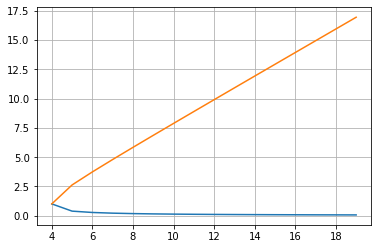

In [5]:
x=[]
y1=[]
y2=[]
for a in range(4,20):
    x.append(a)
    y1.append(np.abs((-(a-2)+np.sqrt(a*(a-4)))/2))
    y2.append(np.abs((-(a-2)-np.sqrt(a*(a-4)))/2))
plt.plot(x,y1)
plt.plot(x,y2)
plt.grid()

So overall if $\frac{k}{m}\Delta t^2 < 4$ method converges, if $\frac{k}{m}\Delta t^2>4$ - diverges. We can easily prove it using leaprog implementation from the seminar. On graphs below you can see the behaviour of phase trajectories of pendulum and it's energy.

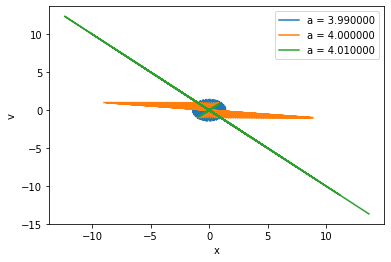

In [6]:
def f1(k,m,x):
    return - k/m*x
def E(k,m,X):
    return m*X[1]*X[1]/2+k*X[0]*X[0]/2

def Leapfrog(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0+dt/2.*f1(k,m,x0)] # at half-integer times
    tHistory = [0]
    for n in range(N):
        xHistory.append(xHistory[-1]+dt*vHistory_[-1])
        vHistory_.append(vHistory_[-1]+dt*f1(k,m,xHistory[-1]))
        tHistory.append(dt*(n+1))
    # define vHistory for integer times
    vHistory = [(vHistory_[n]+vHistory_[n+1])/2. for n in range(len(vHistory_)-1)]
    assert len(xHistory) == len(vHistory)+1
    return xHistory[1:], vHistory, tHistory[1:]
for k in range(399,402):
    m=1
    dt = 10**(-1)
    xHistory, vHistory,_ = Leapfrog(f1, 1., 1., dt=dt, N=int(10./dt)) 
    a = k/m*dt**2 
    plt.plot(xHistory, vHistory, label='a = %f' %a )
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='best')  
plt.show()

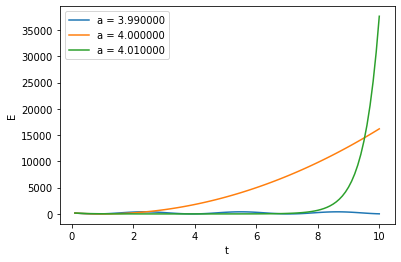

In [7]:
for k in range(399,402):
    m=1
    dt = 10**(-1)
    a = k/m*dt**2 
    xHistory, vHistory, tHistory = Leapfrog(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E(k,m,[xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='a = %f' %a )
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

# If a = 4.03, E~1e+18

Considering $N$ in our task to be relatively big, $\Delta t$ will be very small so for divergence we need to have very big ratio of $\frac{k}{m}$. It can be acheived, for example, with very low mass and large $k$,  which physically shouldn't cause any problem (and motion). But Leapfrog method will fail the calculations in such conditions (which happen actually rather rare since ordinary $\Delta t < 10^{-6}$, thus $\frac{k}{m}$ should be $<4\cdot 10^{-6}$ that is kind of non-physical in case of simple oscillator).

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.

### Solution
$\text{Let's consider 2 different Taylor expansions (similar to leapfrog method partly considered during the seminar):}$
$x_{n+1}=x_n+\dot x_n \Delta t+\frac{1}{2}\ddot  x_n {\Delta t}^2+\frac{1}{6}\dddot  x_n {\Delta t}^3+O({(\Delta t)^4})=x_n+v_n \Delta t+\frac{1}{2}a_n {\Delta t}^2+\frac{1}{6}\dot  a_n {\Delta t}^3+O({(\Delta t)^4})$ <br>
$x_{n-1}=x_n-\dot x_n \Delta t+\frac{1}{2}\ddot  x_n {\Delta t}^2-\frac{1}{6}\dddot  x_n {\Delta t}^3+O({(\Delta t)^4})=x_n-v_n \Delta t+\frac{1}{2}a_n {\Delta t}^2-\frac{1}{6}\dot  a_n {\Delta t}^3+O({(\Delta t)^4})$ <br>
$\text{Now we'll compute the sum of }x_{n+1}, x_{n-1}:$ <br>
$x_{n-1}+x_{n+1}=2x_n+ a_n {\Delta t}^2+O({(\Delta t)^4})$<br>
$2x_{n+1}=x_{n+1}+2x_n-x_{n-1}+ a_n {\Delta t}^2+O({(\Delta t)^4})=\Bigr/ x_{n+1}-x_{n-1} \rightarrow 2\Delta t \cdot v_{n} \Bigr/=2\Delta t \cdot v_{n}+2x_n+ a_n {\Delta t}^2+O({(\Delta t)^4}) \Rightarrow$<br>
$x_{n+1}=x_n+v_n\Delta t + \frac{1}{2}a_n {\Delta t}^2+O({(\Delta t)^4}) \text{, and as for velocity we can use same formulas computed at different moment of time :}$ <br>
$x_{n-2}+x_n=2x_{n-1}+ a_{n-1} {\Delta t}^2+O({(\Delta t)^4}) \quad(1)$<br>
$x_{n-1}+x_{n+1}=2x_n+ a_n {\Delta t}^2+O({(\Delta t)^4}) \quad(2)$<br>
$(1) + (2) =\Bigr/x_{n+1}-x_{n-1} \rightarrow 2\Delta t \cdot v_{n},\ x_{n}-x_{n-2} \rightarrow 2\Delta t \cdot v_{n-1}\Bigr/\Rightarrow v_n=v_{n-1}+\frac{\Delta t}{2}(a_n+a_{n-1})+O({(\Delta t)^3})$<br>
$\text{Thus we have 2 equations for position and velocity, that actually are the same to 3 velocity Verlet equations:}$ <br>
$v_{n+1}+v_{n+\frac{1}{2}}=v_n+v_{n+\frac{1}{2}}+\frac{\Delta t}{2}(a_{n+1}+a_{n})+O({(\Delta t)^3})\ \text{is equal to}$<br>
$v_{n+1/2}=v_{n}+\frac{1}{2}f_1(x_n)\Delta t+O({(\Delta t)^3})$ <br>
$v_{n+1} =v_{n+1/2}+\frac{1}{2}f_1( x_{n+1})\Delta t +O({(\Delta t)^3})\text{, where }\ a_n=f_1(x_n)\ (\text{~ equivalent force})$<br>
$x_{n+1}=x_n+\underbrace{(v_n\Delta t + \frac{1}{2}a_n {\Delta t}^2+O({(\Delta t)^3}))}_{v_{n+\frac{1}{2}}\cdot \Delta t +O({(\Delta t)^3})}$ <br>
$\text{As we can see, we manage to get accuracy with order }O({(\Delta t)^4}). \text{This is the local error in position of the Velocity Verlet algorithm.}$ <br>
$\text{Global position error will be not so optimistic: }\frac{N(N+1)}{2}\cdot O({(\Delta t)^4})\text{. Why so? Let's try to prove it by induction. Let E() be the Error funcion: }E(x_1)=O({(\Delta t)^4}), E(x_N)=E(2x_{N-1}-x_{N-2}+a_N(\Delta t)^2+O{(\Delta t)^4}). \text{ Induction hypothesis: } E(x_{N-1})=\frac{(N-1)N}{2}\cdot O({(\Delta t)^4})) \Rightarrow \quad E(x_N)=E(2x_{N-1}-x_{N-2}+a_N(\Delta t)^2+O({(\Delta t)^4}))=2E(x_{N-1})-E(x_{N-2}))+O({\Delta t)^4})=(N(N-1)-\frac{(N-1)(N-2)}{2})O({(\Delta t)^4})+O({(\Delta t)^4})=(\frac{n^2}{2}+\frac{n}{2})O({(\Delta t)^4})=\frac{N(N+1)}{2}\cdot O({(\Delta t)^4})\text{. So basically we accumulate the error not only from previous iteration, as with Leapfrog, but even from pre-previous}. $<br>
$\text{Since N ~ }\frac{1}{\Delta t}\ \text{ we will have global position error on a constant interval of time }O({(\Delta t)^2})$<br>
$\text{Because the velocity is determined from the positions in a non-cumulative way - as }\frac{x_{n+1}-x_{n-1}}{2\Delta t}\rightarrow v_{n}\text{, the global error in velocity is also }O({(\Delta t)}^{2}).$<br>
$\text{So our global convergence order - }O({(\Delta t)^2})\text{, what we clearly can see from the experiment with pendulum below.}$<br>

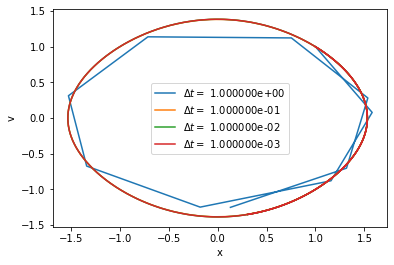

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x):
    return - np.sin(x) # Function for ordinary pendulum

def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

def Verlet(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0] # at integer times
    v_half = []
    tHistory = [0]
  #  v_half = 0
    for n in range(N):
        v_half.append(vHistory_[-1]+dt/2.*f1(xHistory[-1])) # Computing velocity on a half of a step
        xHistory.append(xHistory[-1]+dt*v_half[-1]) # Computing position
        vHistory_.append(v_half[-1]+dt/2.*f1(xHistory[-1])) # Updatng velocity
        tHistory.append(dt*(n+1))
    return xHistory, vHistory_, tHistory


for m in range(0,4):
    dt = 10**(-m)
    xHistory, vHistory,_ = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    plt.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='best')  
plt.show()


$\text{We will test our error computing the energy of a pendulum: } E=\cfrac{\dot \alpha^2}{2}-\cos \alpha. \text{ As we can see global error is indeed }O{((\Delta t)^2)}.$

Error in E at dt=1.000000e+00: 1.681557e-01
Error in E at dt=1.000000e-01: 1.258845e-03
Error in E at dt=1.000000e-02: 1.256175e-05
Error in E at dt=1.000000e-03: 1.256149e-07
Error in E at dt=1.000000e-04: 1.256143e-09


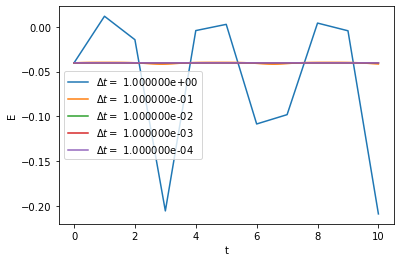

In [9]:
for i in range(0,5):
    dt = 10**(-i)
    xHistory, vHistory, tHistory = Verlet(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()